## Exercise 6: Prediction with Scikit-Learn

In [1]:
import numpy as np
import pandas as pd

### Example: Regression with Scikit-learn

We briefly introduce the main functionalities of the scikit-learn package, again using the Iris plants dataset to predict petal width. Note that there is an extensive documentation on the package: https://scikit-learn.org/stable/documentation.html

In [2]:
from sklearn import datasets

# import the iris dataset - it is actually incorporated in the library
iris = datasets.load_iris()

# recall the details on the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### a) Splitting training and test data

In [3]:
# predict petal width from the previous three columns
# X: Feature matrix, y: target vector
X = iris.data[:, :3]
y = iris.data[:,3]

# sklearn provides various functionalities to crossvalidate model performance
from sklearn.model_selection import train_test_split

# randomly split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

#### b) Fitting a Model

In [4]:
# main precedure after having chosen the model: initialize, fit and predict
from sklearn.linear_model import LinearRegression

# initialize model - at this point you usually specify all parameters for model optimization
reg = LinearRegression(fit_intercept=True)

# fit: other than in statsmodels, training and test data are passed here
reg.fit(X_train, y_train)

print(reg.coef_)
print(reg.intercept_)

[-0.20236345  0.22293855  0.52714255]
-0.28948872942926074


#### c) Model evaluation

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation -> sklearn also provides many functionalities to mearure the 
# performance of both regressors and classifiers

# apply your model on training data
y_pred = reg.predict(X_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

# R² can also directly be computed from the model
print(reg.score(X_test,y_test))

0.034205643946604476
0.9375970738465947
0.9375970738465947


### Task 1: Predicting House Prices from Regularized Regression

In this task we want to predict house prices in the _Bosten House Prices_ dataset that is also conveniently incorporated in sklearn. We load the data in the cell below and print its decription. Note that it is in a _bunch_ format, so that the actual data still has to be extracted. Feel free to explore the data yourself.

In [10]:
# load data and its description - feel free to further explore the data yourself
dta = datasets.load_boston()
print(dta.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### a) Splitting training and test data

We want to evaluate our models on some held-out test set. Get predictors and target variable from the bunch object, and split both into training and test set, using a 60/40 split ration. Make sure your data has been shuffled properly before splitting.

In [11]:
from sklearn.model_selection import train_test_split

X = dta.data
y = dta.target

# train_test_split has a built-in shuffling functionality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

#### b) OLS regression

Fit a simple OLS model on the training data, and compute both MSE and R² score on training and test data. How would you rate the quality of your model?

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

print(mean_squared_error(y_train,y_pred))
print(r2_score(y_train,y_pred))


y_pred = reg.predict(X_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

19.546758473534663
0.7551332741779998
28.530458765974686
0.6956551656111596


**Answer**: Overall the model yields a decent $R^2$ score, and it also appears to generalize reasonably well to the test data. 

#### c) Overfitting Polynomial Models

Apply a preprocessing functionality in sklearn to extent your predictors to polynomials of degree 3.
Fit a new model on the new training data, and apply it on the new test data. What do you observe regarding the scores on the test data?

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

10938.964456163769
-119.80515767659485


**Answer**: When training on the polynomial features, the model severely overfits to the training data as can be seen be the negative $R^2$ score and the huge MSE one the test data.

#### d) Regularization to the Rescue

To ensure that our data generalizes well, we want to apply ridge regression. This however requires that the input data has been scaled properly. Again use a preprocessing functionality in sklearn to scale your data to enable a proper fit. Be careful with the intercept when scaling the data! 

After scaling, fit a ridge regression model using the default parameters, and evaluate the model performance on the test set.
What do you observe?

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import Ridge

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

reg = Ridge(alpha=1, fit_intercept=False)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

12.192888048180198
0.8653470564699104


**Answer:** Due to the regularization, the regression model suddenly generalizes very well, even achieving much better performance on the test set than before when we did not include the polynomial features. Thus, including the polynomial features added much value to the model, but without regularization, the resulting amount of features would naturally tend to overfit.

#### e) Parameter Optimization

We further want to improve our model by optimizing the regularization weight $\alpha$.
Iterate through a set of potential values $\alpha_i\in[0.001,1000]$, and based on each value $\alpha_i$, perform 10-fold cross-validation on the training set to estimate the performance of a ridge regression model with that regression weight. Determine which value $\alpha$ obtained the best cross-validated R² scores, and use this value to fit a model on the complete training data and evaluate it on the test data.  
Note that sklearn also provides a number of handy functionalities to perform cross-validation.

In [18]:
from sklearn.model_selection import cross_val_score

for alpha in [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]:
    rr = Ridge(alpha=alpha, fit_intercept=False)
    print(alpha)
    # apply sklearn's cross_val_score, which on regression models automatically outputs the R² scores for each fold. 
    # we use the mean score for each value of alpha to evaluate its ability to generalize
    print(np.mean(cross_val_score(rr, X_train_scaled, y_train, cv=3)))

0.001
0.6572594271908575
0.005
0.7631051213441035
0.01
0.7786470599649485
0.05
0.8064219779828649
0.1
0.8188268176714154
0.5
0.8358661450847694
1
0.8318075545773939
5
0.7764534967808124
10
0.7323012055162961
50
0.5644350720763707
100
0.4442136554991716


**Answer:** Among the values we considered, $\alpha = 0.5$ appeared to yield the cross-validated performance on the training data.  
Further, it can be observed how for lower values, the model tended to overfit, while for higher values the regression weights became too restricted to work well.

In [19]:
reg = Ridge(alpha=0.5, fit_intercept=False)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11.092211818125246
0.8775024452231617


### Task 2: Multi-Class Classification

In lecture we have focused on the binary case in classification. However, in many applications there are more than two classes to predict.  
One standard strategy to extend binary classification methods to the multiclass case is the so-called _one-vs-all_ approach, which requires a classifier that can also produce a confidence score for its predictions rather than the crisp predictions themselves. In logistic regression for instance, such a confidence score is given by the class probabilities.  
Assuming that you there are $L$ classes $C_1,\dots, C_L$, in the one-vs-all approach one fits $L$ binary models where in the $l$-th model the goal is to predict whether a sample belongs to class $C_l$ or not. After fitting the $l$-th model, the confidence score of each sample belonging to class $C_l$ is then computed and stored, and in the end, the class that achieved the highest confidence score among all $L$ classes is then chosen as the final prediction.

In this task, we are going to implement this approach and apply it on a student evaluation dataset, aiming to predict which of three course instructors has given a class. The dataset is loaded in the cell below, and documented on http://archive.ics.uci.edu/ml/datasets/turkiye+student+evaluation. Feel free to explore the data beforehand. Note that we drop the class (lecture) identifier, since this uniquely determines the instructors.

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00262/turkiye-student-evaluation_generic.csv"

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00262/turkiye-student-evaluation_generic.csv",
                  index_col = False,
                  sep = ',',
                  skipinitialspace = True)
  
df = df.drop(columns = ['class','nb.repeat'])
df.head()

,instr,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,0,4,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### a) Implementing Multiclass-Classification with Logistic Regression

Implement a function mc_predict() that uses the one-vs-all approach to perform multiclass classififcation based on logistic regression. Thus, you have to fit multiple binary models. Use the function signature given in the cell below, i.e. include as input both training data as well as a test set to predict on after fitting the model. You may use sklearn to fit the binary models.  
Apply your function on the student evaluation data, and compute the accuracy on both training and test set!

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def mc_predict(X_train,y_train,X_test):
    Y = np.unique(y_train)
    M = len(Y)
    
    # collect class-wise confidence scores in this matrix
    y_probs = np.zeros((X_test.shape[0],M))
    # iterate over all classes
    for i in range(M):
        # fit binary model
        y_curr = np.array(y_train==Y[i]).astype(int) 
        clf = LogisticRegression()
        clf.fit(X_train, y_curr)
        y_probs[:,i] = clf.predict_proba(X_test)[:,1]

    # return classes that yielded highest confidence
    return np.array([Y[i] for i in np.argmax(y_probs, axis=1)])

In [22]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)


y_pred = mc_predict(X_train,y_train,X_train)
print(accuracy_score(y_train,y_pred))

y_pred = mc_predict(X_train,y_train,X_test)
print(accuracy_score(y_test,y_pred))

0.6219543472685304
0.6179073399271213


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#### b) Comparison to Scikit-learn

Note that the logistic regreesion in sklearn also enables the multiclass case as it has a built-in one-vs-all functionality. Compare your predictions and accuracy scores to those resulting from the built-in functions.

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test)) # same results as in our implementation!

0.6219543472685304
0.6179073399271213


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Task 3: Multiclass Regression with Decision Trees and Random Forests

Other than logistic regressors, decision trees (and thus also random forests) naturally allow for multiclass classification without having to employ a one-vs-all strategy.

#### a) Classification with Decision Trees

Apply the decision tree classifier from sklearn on the student evaluation data and compare the accuracies on training and test data with those resulting from the logistic regression. What do you observe?

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7966145165427032
0.5481520041644976


**Answer:** The decision tree model appears to work very well on the training data, but not to generalize that well. In particular, a single tree by itself gets outperformed by the logistic regression models that we used above.

#### b) Growing a Forest

For all $n\in\{3,\dots,100\}$, apply sklearns functionalities to fit a random forest with $n$ trees on the student evaluation data. For each model, compute the accuracy on the test set, and plot the number of trees against the resulting accuracies.

In [25]:
from sklearn.ensemble import RandomForestClassifier

s=[]
for n in np.arange(3,101):

    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    s.append(clf.score(X_test,y_test))

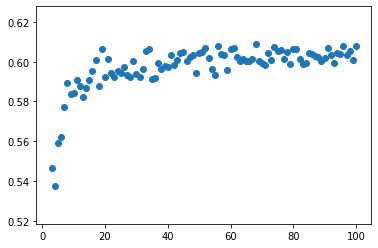

In [27]:
from matplotlib import pyplot as plt
plt.scatter(np.arange(3,101),s)
plt.show()

The plot exemplifies how a growing forest initially tends to strongly improve the performance of the model, until it saturates at some constant maximum level, where the differences in the scores are only due to the noise that the randomness induces.